# Telecom Churn Case Study
- By Gaurav Bharatavalli Rangaswamy

#  Problem Statement


Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.Retaining high profitable customers is the main business goal here.

Retaining high profitable customers is the main business goal here.

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.


##  Business Objective
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

# Approach used

We will be using the following approach for this problem:

We will be taking the following steps for solving this problem:

1. Data preprocessing (Handling the missing values and taking care of the outliers).

2. Conduct appropriate exploratory analysis to extract useful insights

3. Derive new features for columns that seem important and can be clubbed together.

4. Since its a huge dataset, we will try to reduce the number of variables using PCA.

4. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

5. Evaluate the models using appropriate evaluation metrics. Since its important to identify churners than the non-churners accurately, we will evaluate the models using Sensitivity/Recall

Finally, choose a model based on some evaluation metric



##  Procedure
1. Importing Libraries
2. Importing Dataset
3. Data Understanding & Cleaning
4. Deriving New Features
5. Exploratory Data Analysis (Variables Inspection)
6. Data Preparation
6. Handling Data Imbalance
7. Principal Component Analysis (PCA)
8. Model Building
9. Model Evaluation
10. Model Testing
11. Model Inference
12. Another Model Building (For Interpretation)
13. Summary (Recommendation)

# 1. Importing Libraries

In [ ]:
# numpy and pandas package

import numpy as np
import pandas as pd

# Packages for Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE

# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Imprting PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision

# 2. Importing Dataset

In [ ]:
#Importing dataset
telecom_data = pd.read_csv("telecom_churn_data.csv")
#Let's explore the top 5 rows
telecom_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.00,252.00,252.00,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.00,0.00,0.00,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.00,50.00,NaN,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.00,0.00,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.00,1.00,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.00,NaN,NaN,NaN,46.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.26,58.81,83.39,170.83,50.16,43.63,85.48,138.79,19.28,13.4

# 3. Data Understandling & Cleaning

In [ ]:
#Check the stats of the data
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",...,"25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00"
mean,"7,001,207,270.39",109.00,0.00,0.00,0.00,282.99,278.54,279.15,261.65,132.40,133.67,133.02,130.30,197.94,197.05,196.57,190.34,9.95,7.15,7.29,6.34,13.91,9.82,9.97,8.56,47.10,46.47,45.89,44.58,93.34,91.40,91.76,90.46,3.75,3.79,3.68,3.66,1.12,1.37,1.43,1.23,144.20,141.67,141.33,138.71,79.83,83.30,83.28,82.34,87.30,...,0.66,192.60,200.98,197.53,192.73,51.90,51.23,50.17,44.72,121.40,129.00,135.41,136.06,89.56,89.38,91.17,100.26,86.40,85.91,86.60,93.71,0.03,0.02,0.02,0.02,0.08,0.08,0.08,0.07,0.39,0.44,0.45,0.39,0.08,0.08,0.08,0.09,0.07,0.08,0.08,0.08,0.91,0.91,0.89,0.86,"1,219.85",68.17,66.84,60.02,3.30
std,"695,669.39",0.00,0.00,0.00,0.00,328.44,338.16,344.47,342.00,297.21,308.79,308.95,308.48,316.85,325.86,327.17,319.40,72.83,73.45,68.40,57.14,71.44,58.46,64.71,58.44,150.86,155.32,151.18,148.00,162.78,157.49,156.54,158.68,14.23,14.26,13.27,13.46,5.45,7.53,6.78,5.62,251.75,248.73,245.91,245.93,252.48,263.63,265.49,267.18,255.62,...,1.41,192.65,196.79,191.30,188.40,213.36,212.30,212.35,198.65,544.25,541.49,558.78,577.39,193.12,195.89,188.18,216.29,172.77,176.38,168.25,171.38,0.16,0.15,0.14,0.13,0.30,0.30,0.30,0.28,1.50,1.64,1.63,1.35,0.36,0.39,0.38,0.38,0.57,0.63,0.66,0.65,0.28,0.29,0.31,0.35,954.73,267.58,271.20,253.94,32.41
min,"7,000,000,074.00",109.00,0.00,0.00,0.00,"-2,258.71","-2,014.05",-945.81,"-1,899.51",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

## Data Inspection

In [ ]:
#Check the shape of the dataset
telecom_data.shape

(99999, 226)

In [ ]:
#Check the information of the dataframe example the columns data types and null/not null column
print(telecom_data.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [ ]:
telecom_data.shape

(99999, 226)

In [ ]:
pd.options.display.max_rows=300

# Checking the % of null values in all the columns

In [ ]:
100*telecom_data.isnull().mean().sort_values(ascending=False)

arpu_3g_6                                 74.85
night_pck_user_6                          74.85
total_rech_data_6                         74.85
arpu_2g_6                                 74.85
max_rech_data_6                           74.85
fb_user_6                                 74.85
av_rech_amt_data_6                        74.85
date_of_last_rech_data_6                  74.85
count_rech_2g_6                           74.85
count_rech_3g_6                           74.85
date_of_last_rech_data_7                  74.43
total_rech_data_7                         74.43
fb_user_7                                 74.43
max_rech_data_7                           74.43
night_pck_user_7                          74.43
count_rech_2g_7                           74.43
av_rech_amt_data_7                        74.43
arpu_2g_7                                 74.43
count_rech_3g_7                           74.43
arpu_3g_7                                 74.43
total_rech_data_9                       

### Dropping the columns with null values more than or equal to 40%

In [ ]:
# Decide which columns to drop. If the missing values percentage is > 40%, add to the drop list

list_drop_col = list(telecom_data.columns[100*telecom_data.isnull().mean() > 40])
list_drop_col

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [ ]:
telecom_data = telecom_data.drop(list_drop_col,axis=1)

In [ ]:
100*telecom_data.isnull().mean().sort_values(ascending=False)

loc_og_t2m_mou_9                       7.75
loc_ic_t2m_mou_9                       7.75
offnet_mou_9                           7.75
std_ic_t2f_mou_9                       7.75
roam_ic_mou_9                          7.75
std_og_t2t_mou_9                       7.75
roam_og_mou_9                          7.75
std_ic_t2m_mou_9                       7.75
loc_og_t2t_mou_9                       7.75
std_ic_t2o_mou_9                       7.75
loc_og_mou_9                           7.75
std_ic_t2t_mou_9                       7.75
isd_og_mou_9                           7.75
loc_ic_t2f_mou_9                       7.75
loc_og_t2c_mou_9                       7.75
loc_og_t2f_mou_9                       7.75
loc_ic_t2t_mou_9                       7.75
std_og_t2m_mou_9                       7.75
spl_ic_mou_9                           7.75
std_ic_mou_9                           7.75
ic_others_9                            7.75
std_og_mou_9                           7.75
isd_ic_mou_9                    

In [ ]:
telecom_data.shape

(99999, 186)

#Out of 226 columns, 186 columns left after dropping columns having more than 40% missing values

#Dropping all the date columns as they don't add any value to our analysis

In [ ]:
# Dropping all the date columns as they dont add any value to our analysis
for i in telecom_data.columns:
  if 'date' in i:
    telecom_data=telecom_data.drop(i,axis=1)
  else:
    continue

In [ ]:
telecom_data.shape

(99999, 178)

# Dropping the columns that have only 1 unique value in them
- They don't add any value in the model, hence will be dropped..

In [ ]:
drop_col_1_unique_val = []
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        drop_col_1_unique_val.append(i)
        print ( i + " ",telecom_data[i].nunique())

circle_id  1
loc_og_t2o_mou  1
std_og_t2o_mou  1
loc_ic_t2o_mou  1
std_og_t2c_mou_6  1
std_og_t2c_mou_7  1
std_og_t2c_mou_8  1
std_og_t2c_mou_9  1
std_ic_t2o_mou_6  1
std_ic_t2o_mou_7  1
std_ic_t2o_mou_8  1
std_ic_t2o_mou_9  1


In [ ]:
telecom_data = telecom_data.drop(drop_col_1_unique_val,axis=1)

In [ ]:
telecom_data.shape

(99999, 166)

In [ ]:
len(drop_col_1_unique_val)

12

In [ ]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 166 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    arpu_9              float64
 5    onnet_mou_6         float64
 6    onnet_mou_7         float64
 7    onnet_mou_8         float64
 8    onnet_mou_9         float64
 9    offnet_mou_6        float64
 10   offnet_mou_7        float64
 11   offnet_mou_8        float64
 12   offnet_mou_9        float64
 13   roam_ic_mou_6       float64
 14   roam_ic_mou_7       float64
 15   roam_ic_mou_8       float64
 16   roam_ic_mou_9       float64
 17   roam_og_mou_6       float64
 18   roam_og_mou_7       float64
 19   roam_og_mou_8       float64
 20   roam_og_mou_9       float64
 21   loc_og_t2t_mou_6    float64
 22   loc_og_t2t_mou_7    float64
 23   loc_og_t2t_mou_8    float64
 24   

In [ ]:
telecom_data.columns[telecom_data.columns.str.contains('rech_amt|rech_data')]

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9'],
      dtype='object')

In [ ]:
telecom_data_rech_cols = [col for col in telecom_data.columns if 'rech' in col]
telecom_data_rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9']

# Filter high-value customers

In [ ]:
#Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

telecom_data["avg_rech_amount_6_7"] = (telecom_data["total_rech_amt_6"] + telecom_data["total_rech_amt_7"])/2

In [ ]:
#Finding the 70th percentile of the avg_rech_amt_6_7

X = telecom_data["avg_rech_amount_6_7"].quantile(.7)
X

368.5

In [ ]:
# To filter the high valued customers, who have recharged more than or equal to X.

telecom_data = telecom_data[telecom_data["avg_rech_amount_6_7"]>=X]

In [ ]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,...,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amount_6_7
7,7000701601,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.00,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,...,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00"
8,7001524846,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,...,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,519.00
13,7002191713,492.85,205.67,593.26,322.73,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.00,0.00,0.49,0.00,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,...,83.48,16.24,21.44,20.31,6,4,11,7,507,253,717,353,110,110,130,130,110,50,0,0,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.00,380.00
16,7000875565,430.98,299.87,187.89,206.49,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.00,0.00,0.00,0.00,315.91,215.64,205.93,233.04,7.89,2.58,3.23,4.46,22.99,64.51,18.29,13.79,0.00,...,0.00,0.00,0.00,0.00,10,6,2,1,570,348,160,220,110,110,130,220,100,100,130,220,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.00,459.00
17,7000187447,690.01,18.98,25.50,257.58,"1,185.91",9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,58.54,0.00,0.00,9.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.54,0.00,0.00,45.79,"1,146.91",0.81,0.00,504.11,1.55,0.00,0.00,78.51,0.00,...,0.00,0.00,0.00,0.00,19,2,4,10,816,0,30,335,110,0,30,130,30,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.00,408.00


In [ ]:
telecom_data.shape

(30011, 167)

In [ ]:
total_cols = len(telecom_data.columns)
total_cols

167

# Handling missing values in rows


In [ ]:
# Count the rows having more than 50% missing values
telecom_drop_rows_list = telecom_data[telecom_data.isnull().sum(axis=1)>total_cols//2].index

In [ ]:
telecom_drop_rows_list.shape

(114,)

In [ ]:
# Deleting the rows having more than 50% missing values
telecom_data.drop(telecom_drop_rows_list,axis=0,inplace=True)

In [ ]:
telecom_data.shape

(29897, 167)

In [ ]:
# Checking the missing values in columns again
100*telecom_data.isna().mean().sort_values(ascending=False)

og_others_9                           5.32
roam_ic_mou_9                         5.32
loc_og_t2f_mou_9                      5.32
loc_og_t2m_mou_9                      5.32
isd_og_mou_9                          5.32
loc_ic_t2t_mou_9                      5.32
loc_og_t2t_mou_9                      5.32
loc_ic_t2m_mou_9                      5.32
loc_ic_t2f_mou_9                      5.32
std_og_t2t_mou_9                      5.32
roam_og_mou_9                         5.32
loc_ic_mou_9                          5.32
std_og_mou_9                          5.32
std_ic_t2t_mou_9                      5.32
loc_og_t2c_mou_9                      5.32
std_ic_t2m_mou_9                      5.32
offnet_mou_9                          5.32
std_ic_t2f_mou_9                      5.32
std_og_t2f_mou_9                      5.32
std_ic_mou_9                          5.32
onnet_mou_9                           5.32
spl_ic_mou_9                          5.32
loc_og_mou_9                          5.32
isd_ic_mou_

In [ ]:
telecom_data.shape


(29897, 167)

# Changing the datatype of 'mobile_number' and 'circle_id' from numerical to categorical

In [ ]:
telecom_data['mobile_number'] = telecom_data['mobile_number'].astype('object')

# Replacing NAN values

In [ ]:
print("No. of columns containing null values")
print(len(telecom_data.columns[telecom_data.isna().any()]))

No. of columns containing null values
108


In [ ]:
telecom_data = telecom_data.fillna(0)

In [ ]:
print(len(telecom_data.columns[telecom_data.isna().any()]))

0


In [ ]:
100*telecom_data.isna().mean().sort_values(ascending=False)

mobile_number                         0.00
total_ic_mou_6                        0.00
total_ic_mou_8                        0.00
total_ic_mou_9                        0.00
spl_ic_mou_6                          0.00
spl_ic_mou_7                          0.00
spl_ic_mou_8                          0.00
spl_ic_mou_9                          0.00
isd_ic_mou_6                          0.00
isd_ic_mou_7                          0.00
isd_ic_mou_8                          0.00
isd_ic_mou_9                          0.00
ic_others_6                           0.00
ic_others_7                           0.00
ic_others_8                           0.00
ic_others_9                           0.00
total_rech_num_6                      0.00
total_rech_num_7                      0.00
total_rech_num_8                      0.00
total_ic_mou_7                        0.00
std_ic_mou_9                          0.00
total_rech_amt_6                      0.00
std_ic_mou_8                          0.00
loc_ic_mou_

In [ ]:
100-(telecom_data.shape[0]/99999)*100

70.10270102701027

In [ ]:
telecom_data["churn"] = np.where((telecom_data["total_ic_mou_9"]==0) & (telecom_data["total_og_mou_9"]==0)
                                          & (telecom_data["vol_2g_mb_9"]==0) & (telecom_data["vol_3g_mb_9"]==0),1,0)

In [ ]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,...,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amount_6_7,churn
7,7000701601,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,...,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00",1
8,7001524846,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,...,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,519.00,0
13,7002191713,492.85,205.67,593.26,322.73,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.00,0.00,0.49,0.00,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,...,16.24,21.44,20.31,6,4,11,7,507,253,717,353,110,110,130,130,110,50,0,0,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.00,380.00,0
16,7000875565,430.98,299.87,187.89,206.49,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.00,0.00,0.00,0.00,315.91,215.64,205.93,233.04,7.89,2.58,3.23,4.46,22.99,64.51,18.29,13.79,0.00,...,0.00,0.00,0.00,10,6,2,1,570,348,160,220,110,110,130,220,100,100,130,220,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.00,459.00,0
17,7000187447,690.01,18.98,25.50,257.58,"1,185.91",9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,58.54,0.00,0.00,9.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.54,0.00,0.00,45.79,"1,146.91",0.81,0.00,504.11,1.55,0.00,0.00,78.51,0.00,...,0.00,0.00,0.00,19,2,4,10,816,0,30,335,110,0,30,130,30,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.00,408.00,0


In [ ]:
telecom_data = telecom_data.drop((col for col in telecom_data.columns if '_9' in col),axis=1)

In [ ]:
telecom_data.shape

(29897, 128)

In [ ]:
round(100*(telecom_data['churn'].mean()),2)

8.5

In [ ]:
#Calculate the percentage of the missing values for each column
100*telecom_data.isnull().mean().sort_values(ascending=False)

mobile_number                         0.00
arpu_6                                0.00
total_rech_amt_6                      0.00
total_rech_num_8                      0.00
total_rech_num_7                      0.00
total_rech_num_6                      0.00
ic_others_8                           0.00
ic_others_7                           0.00
ic_others_6                           0.00
isd_ic_mou_8                          0.00
isd_ic_mou_7                          0.00
isd_ic_mou_6                          0.00
spl_ic_mou_8                          0.00
spl_ic_mou_7                          0.00
spl_ic_mou_6                          0.00
total_ic_mou_8                        0.00
total_ic_mou_7                        0.00
total_ic_mou_6                        0.00
std_ic_mou_8                          0.00
std_ic_mou_7                          0.00
std_ic_mou_6                          0.00
std_ic_t2f_mou_8                      0.00
std_ic_t2f_mou_7                      0.00
std_ic_t2f_

In [ ]:
# List only the numeric columns
numeric_cols = telecom_data.select_dtypes(exclude=['object']).columns
numeric_cols = numeric_cols.drop('churn')
print(numeric_cols)

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'avg_rech_amount_6_7'],
      dtype='object', length=127)


In [ ]:
#Imputing Outliers - Treatment .. imputing the Outliers with Lower Bound and Upper bound
#Capping and Flooring
#Interquartile Range (IQR) = ( 75th percentile(Q3) – 25 percentile(Q1))
#Lower Bound = Q1 - 1.5*IQR
#Upper Bound = Q3 + 1.5*IQR
#Values < Lower Bound  Lower Bound
#Values > Upper Bound  Upper Bound

for i in numeric_cols:
    q1=telecom_data[i].describe()["25%"]
    q3=telecom_data[i].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    telecom_data[i]=np.where(telecom_data[i]<lower_bound,lower_bound,telecom_data[i])
    telecom_data[i]=np.where(telecom_data[i]>upper_bound,upper_bound,telecom_data[i])

In [ ]:
telecom_data.shape

(29897, 128)

# 4. Deriving New Features
- Let's consider the variables on which the new variabels will be derived.

In [ ]:
telecom_data_rech_cols = [col for col in telecom_data.columns if 'rech' in col]
telecom_data_rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'avg_rech_amount_6_7']

In [ ]:
telecom_data.columns[telecom_data.columns.str.contains('rech_amt|rech_data|total_')]

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8'],
      dtype='object')

# Derive new features:

### Deriving the new feature 'decreased_ic_og_mou'
- In this, we are assigning the churn if the customer has less minutes of usage both incoming and outgoing in the month of August (Action phase) compared to both June and July (Good phase).

In [ ]:
telecom_data["avg_mou_good"] = (telecom_data["total_og_mou_6"] + telecom_data["total_ic_mou_6"]+telecom_data["total_og_mou_7"] + telecom_data["total_ic_mou_7"])/2

In [ ]:
telecom_data["total_mou_action"] = telecom_data["total_og_mou_8"] + telecom_data["total_ic_mou_8"]

In [ ]:
telecom_data["decreased_ic_og_mou"] = np.where(telecom_data["total_mou_action"]<telecom_data["avg_mou_good"],1,0)

### Deriving the new feature 'decreased_rech_num'
- In this we, are assigning the churn if the customer has less recharge number in the month of August (Action phase) compared to both June and July (Good phase).

In [ ]:
telecom_data["avg_rech_num_good"] = (telecom_data["total_rech_num_6"] + telecom_data["total_rech_num_7"])/2

In [ ]:
telecom_data["decreased_rech_num"] = np.where(telecom_data["total_rech_num_8"]<telecom_data["avg_rech_num_good"],1,0)

### Deriving the new feature 'decreased_max_rech'
- In this, we are assigning the churn if the customer's maximum recharge amount in August (Action phase) is <30% of the Maximum recharge amount done in the months of both June and July (Good phase).

In [ ]:
telecom_data["avg_max_rech_amt_good"] = (telecom_data["max_rech_amt_6"] + telecom_data["max_rech_amt_7"])/2

In [ ]:
telecom_data["decreased_max_rech"] = np.where(telecom_data["max_rech_amt_8"]<telecom_data["avg_max_rech_amt_good"],1,0)

In [ ]:
telecom_data.shape

(29897, 135)

In [ ]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29897 entries, 7 to 99997
Data columns (total 135 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    mobile_number          float64
 1    arpu_6                 float64
 2    arpu_7                 float64
 3    arpu_8                 float64
 4    onnet_mou_6            float64
 5    onnet_mou_7            float64
 6    onnet_mou_8            float64
 7    offnet_mou_6           float64
 8    offnet_mou_7           float64
 9    offnet_mou_8           float64
 10   roam_ic_mou_6          float64
 11   roam_ic_mou_7          float64
 12   roam_ic_mou_8          float64
 13   roam_og_mou_6          float64
 14   roam_og_mou_7          float64
 15   roam_og_mou_8          float64
 16   loc_og_t2t_mou_6       float64
 17   loc_og_t2t_mou_7       float64
 18   loc_og_t2t_mou_8       float64
 19   loc_og_t2m_mou_6       float64
 20   loc_og_t2m_mou_7       float64
 21   loc_og_t2m_mou_8       float64
 2

## 5. Exploratory Data Analysis (Variables Inspection)

### Data Imbalance Check

In [ ]:
di = telecom_data['churn'].value_counts(normalize=True)*100
di

0                  91.50
1                   8.50
Name: churn, dtype: float64

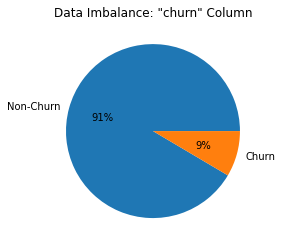

In [ ]:
di = telecom_data['churn'].value_counts(normalize=True)*100
# Pie Plot
plt.pie(di, labels=['Non-Churn', "Churn"], autopct='%.0f%%')
plt.title('Data Imbalance: "churn" Column')
plt.show()

# Data Imbalance Ratio

In [ ]:
di[0]/di[1]

10.761211644374507

# Insight
- Data Imbalance ratio (Non-Churn to Churn) is 10.76:1
- Very high data imbalance can be seen from the pie plot and the ratio. Data Imbalance problem will be handled in the subsequent steps.

# Univariate and Multi-variate Analysis

In [ ]:
# Getting the list of binary categorical columns
[i for i in telecom_data.columns if telecom_data[i].nunique()==2]

['churn', 'decreased_ic_og_mou', 'decreased_rech_num', 'decreased_max_rech']

# Creating Function for plotting the Univariate and Bi-variate plots

In [ ]:
# Creating function for plotting the Univariate and Bi-variate plots
def uni_mul_plot(x, telecom_data):
  plt.figure(figsize=[16,12])
  plt.subplot(3,3,1)
  sns.countplot(x=x, data=telecom_data)
  plt.title(f'Categorical Level Density of {x} Column')
  plt.subplot(3,3,2)
  sns.countplot(x=x, palette=["green", "red"], data=telecom_data, hue='churn')
  plt.title('% of Churn in Each Categorical Levels')
  plt.legend(labels=['Non-Churn', 'Churn'], loc='upper right')
  plt.tight_layout()
  plt.show()

# Decreased Minutes of Usage (decreased_ic_og_mou)

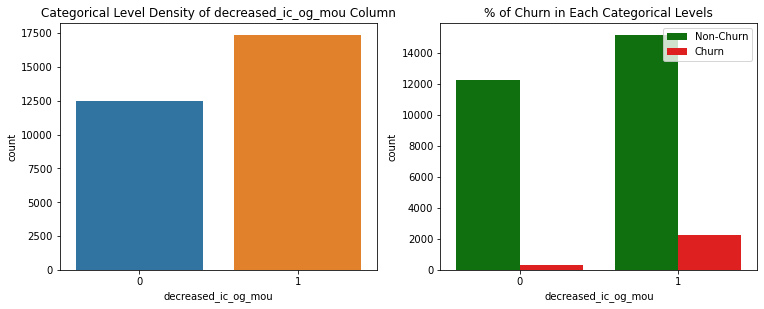

In [ ]:
uni_mul_plot('decreased_ic_og_mou', telecom_data)

#### Insight
- From the plots we can see that with the decrease in the total(incoming and outgoing) minutes of usage in August (Action phase), customer have tended to churn.

#### Decreased Recharge Number (decreased_rech_num)

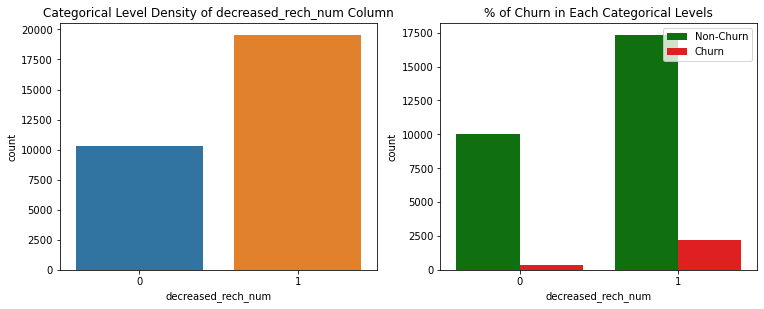

In [ ]:
uni_mul_plot('decreased_rech_num', telecom_data)

#### Insight
- From the plots we can see that with the decrease in total recharge numbers made in August (Action phase), customers have tended to churn.

#### Decreased Maximum Recharge Amount (decreased_max_rech)

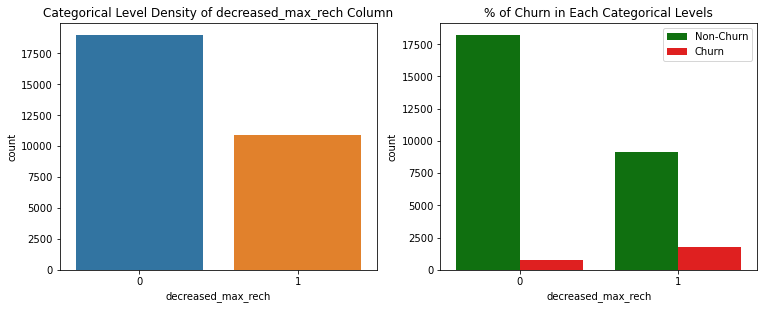

In [ ]:
uni_mul_plot('decreased_max_rech', telecom_data)

#### Insight
- From the plots we can see that with the decrease in total Maximum recharge Amount made in August (Action phase), customers have tended to churn.

# Average Recharge Per User (arpu_8)

<Figure size 360x360 with 0 Axes>

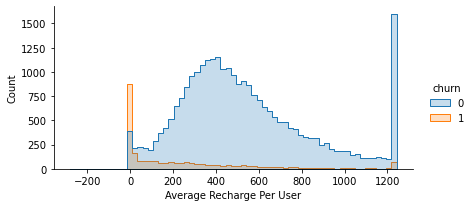

In [ ]:
plt.figure(figsize=[5,5])
sns.displot(data=telecom_data, x="arpu_8", hue="churn", kde_kws={"linestyle":"--"}, element="step", height=3, aspect=2)
plt.xlabel('Average Recharge Per User')
plt.show()

#### Insight
- From the plot, we can observe that, if the average revenue per user is less (towards nill/0) in August month (Action phase), then the customer tend to churn.

#### Total Minutes of Usage (total_ic_mou_8 + total_og_mou_8)

<Figure size 360x360 with 0 Axes>

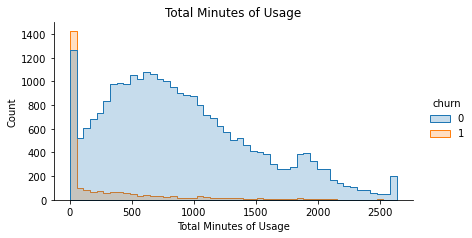

In [ ]:
plt.figure(figsize=[5,5])
sns.displot(data=telecom_data, x=telecom_data['total_ic_mou_8']+telecom_data['total_og_mou_8'], hue="churn", kde_kws={"linestyle":"--"}, element="step", height=3, aspect=2)
plt.title('Total Minutes of Usage')
plt.xlabel('Total Minutes of Usage')
plt.show()

#### Insight
- From the plot, we can observe that, if the total minutes of usage (both incoming and outgoing) is less (towards nill/0), then the customer tend to churn.

#### Analysis of recharge amount and number of recharge in action month

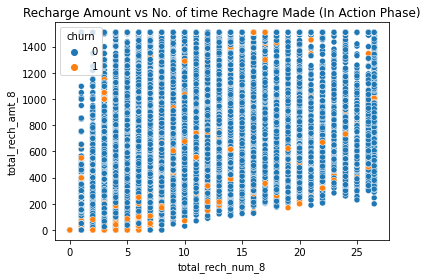

In [ ]:
sns.scatterplot(x='total_rech_num_8', y='total_rech_amt_8', hue='churn', data=telecom_data)
plt.title('Recharge Amount vs No. of time Rechagre Made (In Action Phase)')
plt.show()

#### Recharge Amount vs No. of time Rechagre Made (In Action Phase)

#### Insight
- Not much useful insight was drawn from here due to the data imbalance.
- But from the observation we can note that, churn rate is high for customers who have done less recharge amount and less no. of times recharge in August (Action phase).

#### Getting the correlation matrix will be very difficult due to the large set of variables. Hence, multicollinearity will be handled during the model building.

In [ ]:
rech_list = telecom_data.columns[telecom_data.columns.str.contains('rech')]
rech_list

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'avg_rech_amount_6_7', 'avg_rech_num_good', 'decreased_rech_num',
       'avg_max_rech_amt_good', 'decreased_max_rech'],
      dtype='object')

#### Box plot for Recharge Amount from Month 6th to month 8th:


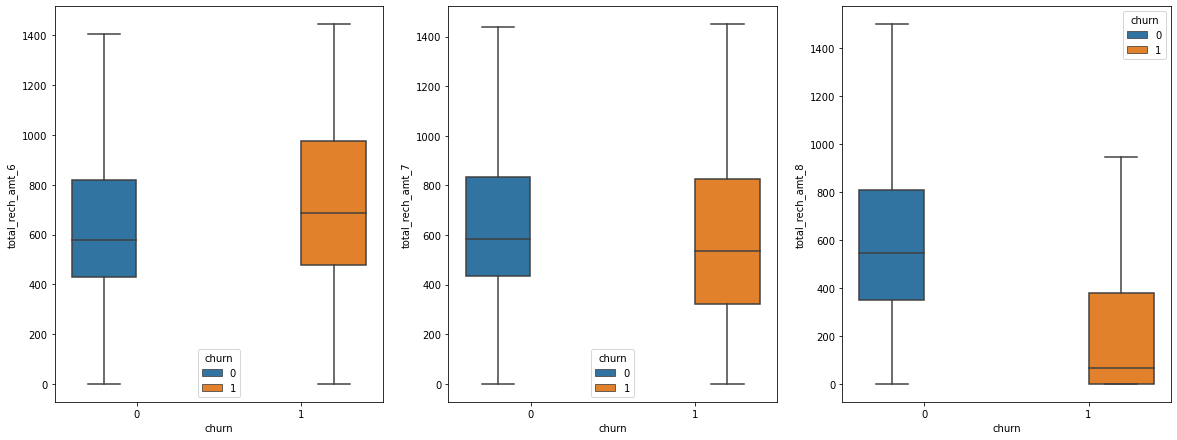

In [ ]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=telecom_data,y="total_rech_amt_6",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=telecom_data,y="total_rech_amt_7",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=telecom_data,y="total_rech_amt_8",x="churn",hue="churn",showfliers=False)
plt.show()

#### Insight
- The recharge amount for the customers who have churned is decreasing gradually from 6th to 8th month.

#### Box plot for Total recharge for Number from Month 6th to month 8th:


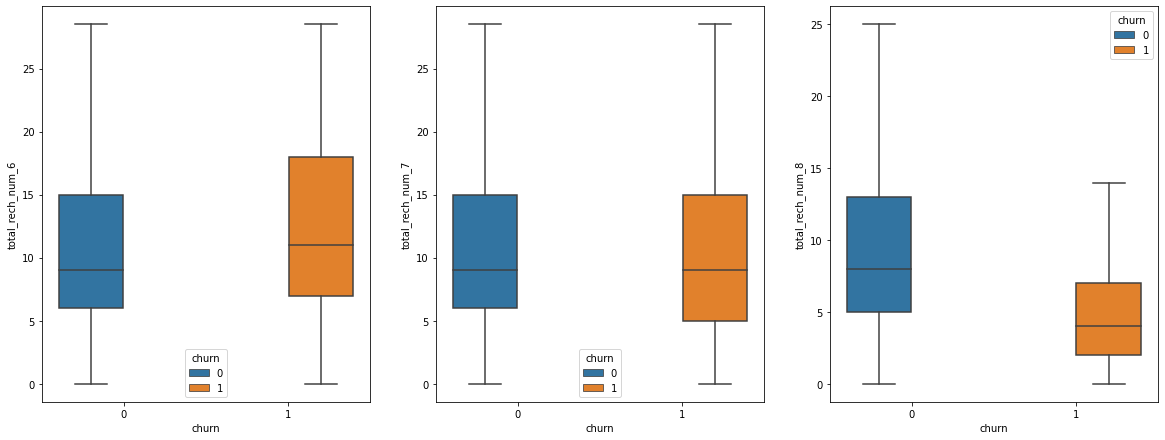

In [ ]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=telecom_data,y="total_rech_num_6",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=telecom_data,y="total_rech_num_7",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=telecom_data,y="total_rech_num_8",x="churn",hue="churn",showfliers=False)
plt.show()

#### Insight
- The Number of recharges made for the customers who have churned is decreasing gradually from 6th to 8th month.

#### Box plot for Max recharge Amount from Month 6th to month 8th:

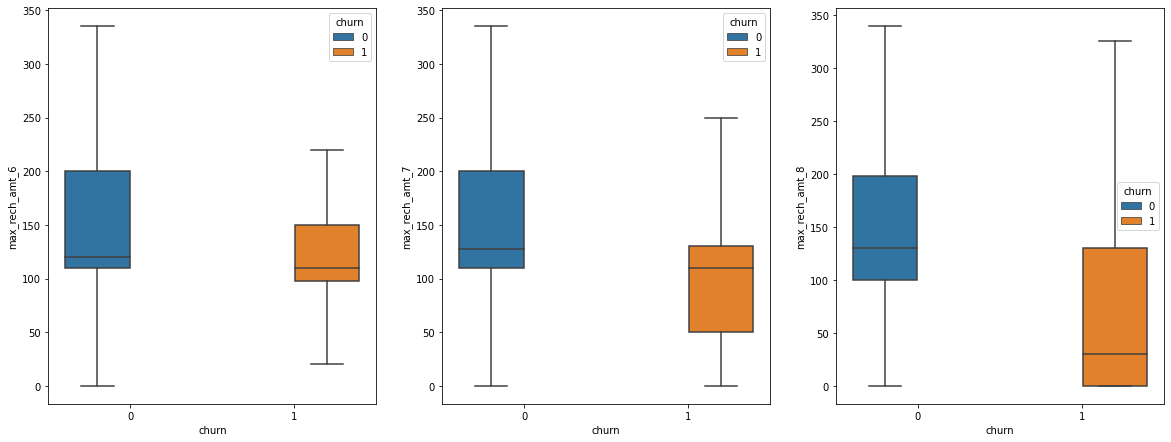

In [ ]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=telecom_data,y="max_rech_amt_6",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=telecom_data,y="max_rech_amt_7",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=telecom_data,y="max_rech_amt_8",x="churn",hue="churn",showfliers=False)
plt.show()

#### Insight
- We can see a huge decrease in the Maximum Recharge amount in the 8th month for the customers who have churned.

#### Ploting for volume of 2G and 3G usage columns:

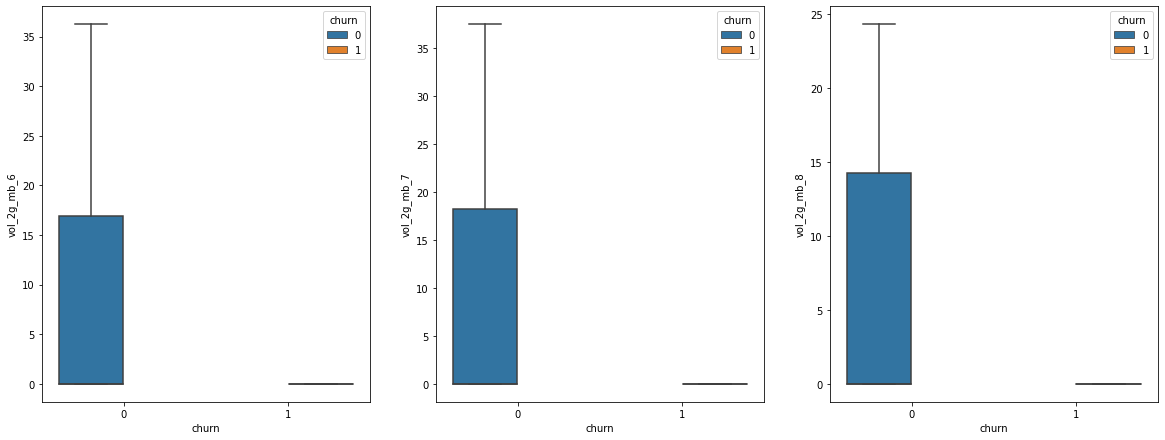

In [ ]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=telecom_data,y="vol_2g_mb_6",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=telecom_data,y="vol_2g_mb_7",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=telecom_data,y="vol_2g_mb_8",x="churn",hue="churn",showfliers=False)
plt.show()

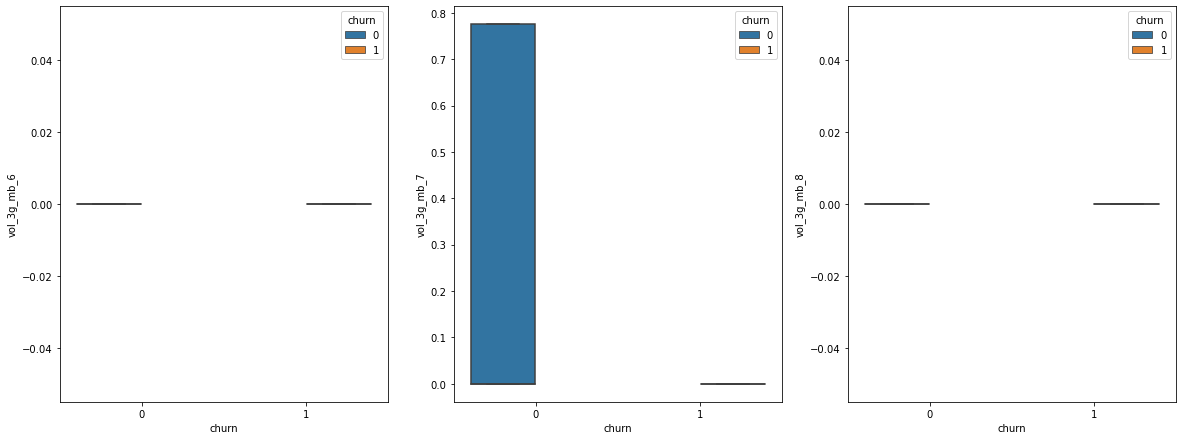

In [ ]:
# Ploting for Total recharge for Number:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=telecom_data,y="vol_3g_mb_6",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=telecom_data,y="vol_3g_mb_7",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=telecom_data,y="vol_3g_mb_8",x="churn",hue="churn",showfliers=False)
plt.show()

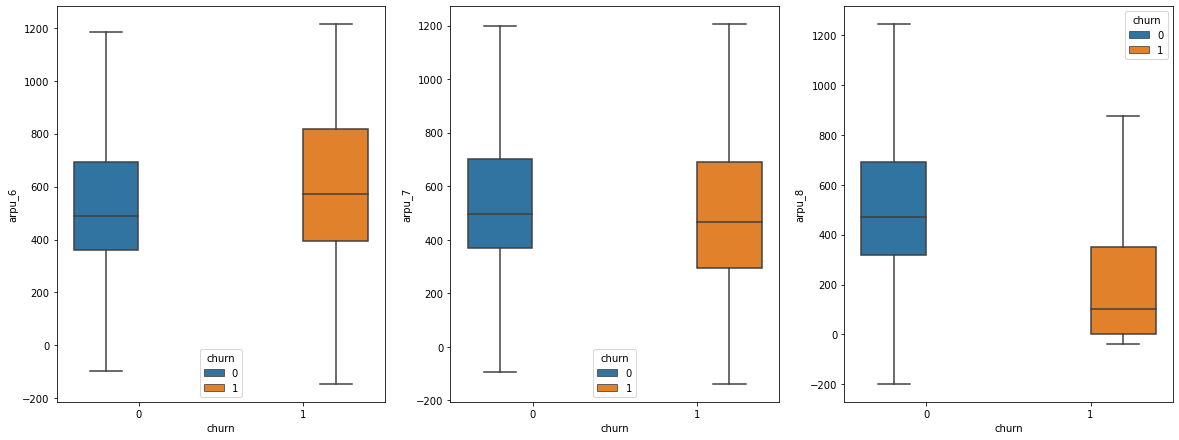

In [ ]:
# Ploting for Total recharge for Number:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=telecom_data,y="arpu_6",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=telecom_data,y="arpu_7",x="churn",hue="churn",showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=telecom_data,y="arpu_8",x="churn",hue="churn",showfliers=False)
plt.show()

#### Insight
The above graph shows huge decrease for Average revenue per user in 8th month for churned customers

#### Correlations on a heatmap

#### Getting the correlation matrix will be very difficult due to the large set of variables. Hence, multicollinearity will be handled during the model building.

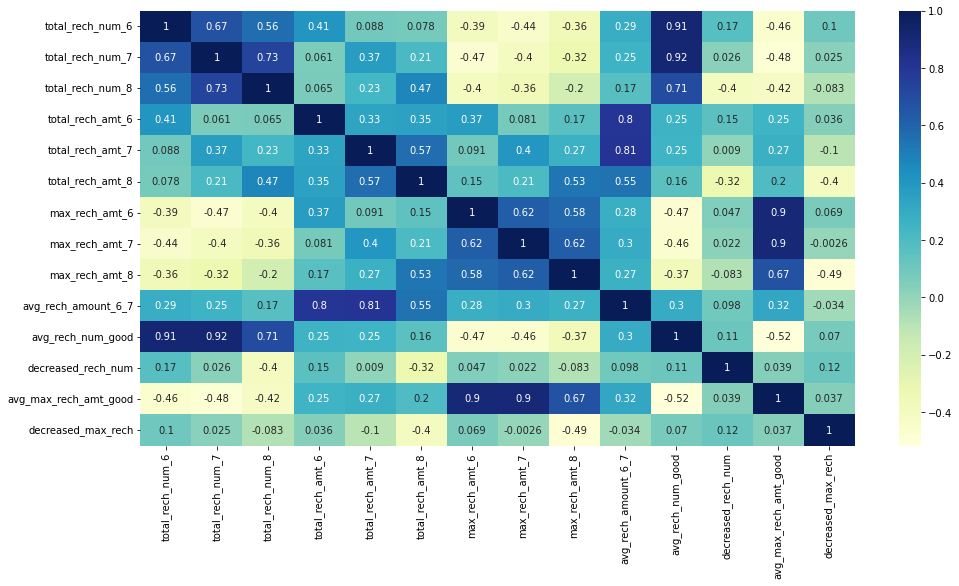

In [ ]:
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(telecom_data[rech_list].corr(), cmap="YlGnBu", annot=True)
plt.show()


## 6. Modeling
### Train-Test Split

In [ ]:
# Shape before the split
telecom_data.shape

(29897, 135)

### Splitting the Data into Train and Test Data

In [ ]:
telecom_data_train, telecom_data_test = train_test_split(telecom_data, train_size=0.70, test_size=0.30, random_state=100, stratify=telecom_data['churn'])

### Train data shape

In [ ]:
# Train data shape
telecom_data_train.shape

(20927, 135)

### Test data shape

In [ ]:
# Test data shape
telecom_data_test.shape

(8970, 135)

### Checking the quantity of churn and non-churn in train data

In [ ]:
# Checking the quantity of churn and non-churn in train data
telecom_data_train['churn'].value_counts()

0    19148
1    1779 
Name: churn, dtype: int64

### Checking the quantity of churn and non-churn in test data

In [ ]:
# Checking the quantity of churn and non-churn in test data
telecom_data_test['churn'].value_counts()

0    8207
1    763 
Name: churn, dtype: int64

### Defining y_train, X_train, y_test, X_test

In [ ]:
y_train = telecom_data_train['churn']
X_train = telecom_data_train.drop(columns=['mobile_number', 'churn'])
y_test = telecom_data_test['churn']
X_test = telecom_data_test.drop(columns=['mobile_number', 'churn'])

In [ ]:
telecom_data_test.shape

(8970, 135)

### Re-scaling the data based using MinMaxScaling

In [ ]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

### Checking the scaled data

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,"20,927.00",0.00,1.00,-2.52,-0.70,-0.23,0.52,2.35
arpu_7,"20,927.00",0.00,1.00,-2.52,-0.70,-0.23,0.51,2.34
arpu_8,"20,927.00",-0.00,1.00,-2.49,-0.68,-0.17,0.52,2.34
onnet_mou_6,"20,927.00",-0.00,1.00,-0.91,-0.75,-0.43,0.43,2.21
onnet_mou_7,"20,927.00",0.00,1.00,-0.90,-0.75,-0.44,0.43,2.19
onnet_mou_8,"20,927.00",-0.00,1.00,-0.87,-0.76,-0.44,0.41,2.17
offnet_mou_6,"20,927.00",0.00,1.00,-1.20,-0.76,-0.30,0.46,2.34
offnet_mou_7,"20,927.00",-0.00,1.00,-1.19,-0.76,-0.30,0.47,2.35
offnet_mou_8,"20,927.00",0.00,1.00,-1.09,-0.77,-0.30,0.48,2.40
roam_ic_mou_6,"20,927.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,"8,970.00",0.01,1.00,-2.52,-0.69,-0.21,0.54,2.35
arpu_7,"8,970.00",0.01,1.00,-2.52,-0.69,-0.23,0.53,2.34
arpu_8,"8,970.00",0.01,1.01,-1.75,-0.68,-0.16,0.54,2.34
onnet_mou_6,"8,970.00",-0.00,1.00,-0.91,-0.75,-0.44,0.43,2.21
onnet_mou_7,"8,970.00",-0.00,1.00,-0.90,-0.75,-0.44,0.41,2.19
onnet_mou_8,"8,970.00",0.00,1.00,-0.87,-0.75,-0.44,0.43,2.17
offnet_mou_6,"8,970.00",0.02,1.02,-1.20,-0.76,-0.28,0.52,2.34
offnet_mou_7,"8,970.00",0.02,1.02,-1.19,-0.77,-0.30,0.52,2.35
offnet_mou_8,"8,970.00",0.01,1.02,-1.09,-0.78,-0.30,0.51,2.40
roam_ic_mou_6,"8,970.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00


## 7. Handling Data Imbalance (SMOTE)

In [ ]:
# Shape before handling data imbalance
X_train.shape

(20927, 133)

### Handling Data Imbalance using SMOTE

In [ ]:
smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_resample(X_train, y_train)

### Now doing the data imbalance check again

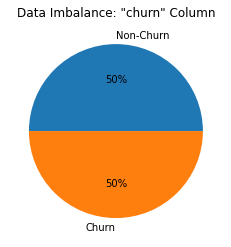

In [ ]:
di = y_train.value_counts(normalize=True)*100
# Pie Plot
plt.pie(di, labels=['Non-Churn', "Churn"], autopct='%.0f%%')
plt.title('Data Imbalance: "churn" Column')
plt.show()

- Data is now balanced.

# Data Modeling without PCA
# Beginning with Basic Logistic Regression (without PCA)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=42)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Evaluating the model**

In [ ]:
y_train_pred = logreg.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,confusion_matrix, classification_report

In [ ]:
accuracy_score(y_train, y_train_pred)

0.8466419469396281

In [ ]:
recall_score(y_train, y_train_pred)

0.8438479214539377

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[16265,  2883],
       [ 2990, 16158]], dtype=int64)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     19148
           1       0.85      0.84      0.85     19148

    accuracy                           0.85     38296
   macro avg       0.85      0.85      0.85     38296
weighted avg       0.85      0.85      0.85     38296



**Performance on test set**

In [ ]:
y_test_pred = logreg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8374581939799332

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8207
           1       0.32      0.83      0.46       763

    accuracy                           0.84      8970
   macro avg       0.65      0.83      0.68      8970
weighted avg       0.93      0.84      0.87      8970



In [ ]:
recall_score(y_test, y_test_pred)

0.8269986893840104

In [ ]:
y_test.shape

(8970,)

- As we see, the Recall score for Class 0(Non churners) is almost same as than Class 1(Churners).
- Hence this model shows good sensitivity for the Churners
- We see that with simple Logistic Regression Model without PCA has a sensitivity score of 82.7% on unseen data

# Basic model Using RandomForest without PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

**Performance on the train set**

In [ ]:
y_train_pred = rf.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.9999738876122832

In [ ]:
recall_score(y_train, y_train_pred)

1.0

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19148
           1       1.00      1.00      1.00     19148

    accuracy                           1.00     38296
   macro avg       1.00      1.00      1.00     38296
weighted avg       1.00      1.00      1.00     38296



**Performance on unseen data**

In [ ]:
y_test_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8207
           1       0.59      0.62      0.61       763

    accuracy                           0.93      8970
   macro avg       0.78      0.79      0.78      8970
weighted avg       0.93      0.93      0.93      8970



In [ ]:
accuracy_score(y_test, y_test_pred)

0.931438127090301

In [ ]:
recall_score(y_test, y_test_pred)

0.617300131061599

- As we see, the Recall score for Class 0(Non churners) is more (+34%) than Class 1(Churners).
- Hence this model does not show good sensitivity for the Churners
- We see that with simple Random Forest Classifier Model without PCA has a sensitivity score of 61.7% on test data
- Note the all scores are 1 for the train data stating the model is overfitting

# Builing basic model Using Decision Trees without PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [ ]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84     19148
           1       0.93      0.71      0.80     19148

    accuracy                           0.83     38296
   macro avg       0.85      0.83      0.82     38296
weighted avg       0.85      0.83      0.82     38296



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8207
           1       0.51      0.64      0.56       763

    accuracy                           0.92      8970
   macro avg       0.74      0.79      0.76      8970
weighted avg       0.93      0.92      0.92      8970



- As we see, the Recall score for Class 0(Non churners) is high (+30%) than Class 1(Churners).
- Hence this model won't work in our case as we need good recall scores for Churners

#### Hyper-parameter tuning using Grid Search CV for the Decision Tree
- Using the scoring metric as Recall

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 4.39 s
Wall time: 1min 3s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [ ]:
grid_search.best_score_

0.919156047628995

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

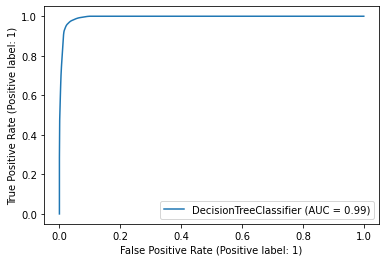

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [ ]:
y_train_pred = dt_best.predict(X_train)

In [ ]:
y_test_pred = dt_best.predict(X_test)

## Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = dt_best.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7383  824]
 [ 281  482]]


In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     19148
           1       0.96      0.97      0.97     19148

    accuracy                           0.97     38296
   macro avg       0.97      0.97      0.97     38296
weighted avg       0.97      0.97      0.97     38296



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      8207
           1       0.37      0.63      0.47       763

    accuracy                           0.88      8970
   macro avg       0.67      0.77      0.70      8970
weighted avg       0.91      0.88      0.89      8970



- We can see from the model performance that the Recall score has decreased while evaluating the model on the test set.

# Model evaluation using Cross validation
- Cross validation score gives a far more reliable estimate of the generalized perforance on unseen data

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1)

array([0.84321149, 0.8481525 , 0.84306045, 0.84554119, 0.84580232])

**Performance on the train set**

In [ ]:
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8451535915527287

In [ ]:
recall_score(y_train, y_train_pred)

0.9736787131815333

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     19148
           1       0.96      0.97      0.97     19148

    accuracy                           0.97     38296
   macro avg       0.97      0.97      0.97     38296
weighted avg       0.97      0.97      0.97     38296



- As we see, the best Recall Score using Grid Search CV in Decision Tree is 91.2 %
- and the best estimators are Max Depth of 20 and Min_samples_leaf as 50

In [ ]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)

array([0.93851175, 0.97153675, 0.96931714, 0.96918658, 0.97140619])

In [ ]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1).mean()

0.9639916826805237

In [ ]:
cross_val_score(dt_best, X_train, y_train, cv=5, n_jobs=-1)

array([0.87349869, 0.91682987, 0.92179136, 0.91931061, 0.9204857 ])

In [ ]:
cross_val_score(dt_best, X_train, y_train, cv=5, n_jobs=-1).mean()

0.9103832484999475

**Note**: OOB Score in RandomForest is somewhat similar to cross val score

In [ ]:
rf.oob_score_

0.9648005013578441

# Feature selection using RFE

- We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).



In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiate the logistic regression
logreg = LogisticRegression()

#RFE with 20 columns
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output

# Fit the rfe model with train set

rfe = rfe.fit(X_train,y_train)

In [ ]:
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7',
       'std_og_t2t_mou_8', 'std_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_6', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'aon', 'total_mou_action'],
      dtype='object')

In [ ]:
X_train2 = X_train.loc[:,rfe.support_]
X_train2.shape

(38296, 20)

In [ ]:
cross_val_score(rfe, X_train2, y_train, n_jobs=-1)

array([0.83577023, 0.8447578 , 0.84031858, 0.8417548 , 0.83992688])

#### Assessing the model with StatsModels

#### Model Number 1 using RFE Selected columns

In [ ]:
import statsmodels.api as sm

In [ ]:
# Adding constant to X_train
X_train_sm1 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())

# Fit the model
logreg_no_pca1 = logm1.fit()
logreg_no_pca1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38296
Model:                            GLM   Df Residuals:                    38275
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14514.
Date:                Tue, 09 May 2023   Deviance:                       29027.
Time:                        23:28:22   Pearson chi2:                 6.15e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4665
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6400      0.024    -69.374      0.000      -1.686      -1.594
arpu_7                 0.5421      0.019     27.915      0.000       0.504       0.580
onnet_mou_8            0.5276      0.043     12.396      0.000       0.444       0.611
loc_og_t2t_mou_8      -0.3455      0.038     -9.164      0.000      -0.419      -0.272
loc_og_t2m_mou_7      -0.2153      0.030     -7.166      0.000      -0.274      -0.156
std_og_t2t_mou_8      -0.5891      0.042    -14.137      0.000      -0.671      -0.507
std_og_mou_8           0.3907      0.057      6.800      0.000       0.278       0.503
loc_ic_t2t_mou_8      -0.2367      0.048     -4.972      0.000      -0.330      -0.143
loc_ic_t2m_mou_7       0.5328      0.042     12.837      0.000       0.451       0.614
loc_ic_t2m_mou_8      -1.1223      0.081    -13.926      0.000      -1.280      -0.964
loc_ic_t2f_mou_8      -0.2570      0.026     -9.728      0.000      -0.309      -0.205
loc_ic_mou_8           0.2918      0.102      2.873      0.004       0.093       0.491
total_ic_mou_6         0.2558      0.027      9.590      0.000       0.203       0.308
ic_others_8           -0.3027      0.020    -15.487      0.000      -0.341      -0.264
total_rech_num_8      -0.6137      0.022    -28.238      0.000      -0.656      -0.571
total_rech_amt_6       0.3280      0.018     17.851      0.000       0.292       0.364
max_rech_amt_6        -0.2717      0.021    -13.143      0.000      -0.312      -0.231
last_day_rch_amt_8    -0.7621      0.021    -35.696      0.000      -0.804      -0.720
vol_2g_mb_8           -0.6957      0.023    -30.644      0.000      -0.740      -0.651
aon                   -0.2638      0.020    -13.493      0.000      -0.302      -0.226
total_mou_action      -0.9827      0.068    -14.394      0.000      -1.116      -0.849
======================================================================================
"""

### Checking VIFs


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,loc_ic_mou_8,32.10
8,loc_ic_t2m_mou_8,19.30
19,total_mou_action,18.49
5,std_og_mou_8,10.47
1,onnet_mou_8,7.97
4,std_og_t2t_mou_8,7.26
6,loc_ic_t2t_mou_8,6.54
7,loc_ic_t2m_mou_7,5.25
2,loc_og_t2t_mou_8,4.70
3,loc_og_t2m_mou_7,3.09


- As we can see from the model summary that all the variables p-values are 0 hence they are all significant and loc_ic_mou_8 column has the highest VIF 32.10. Hence, deleting loc_ic_mou_8 column.



In [ ]:
# Removing loc_ic_mou_8 column
rfe_columns = rfe_columns.drop('loc_ic_mou_8')
print(rfe_columns)

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7',
       'std_og_t2t_mou_8', 'std_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'total_ic_mou_6', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_6',
       'max_rech_amt_6', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'aon',
       'total_mou_action'],
      dtype='object')


#### Model Number 2 using RFE Selected columns

In [ ]:
# Adding constant to X_train
X_train_sm2 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())

# Fit the model
logreg_no_pca2 = logm2.fit()
logreg_no_pca2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38296
Model:                            GLM   Df Residuals:                    38276
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14518.
Date:                Tue, 09 May 2023   Deviance:                       29035.
Time:                        23:28:24   Pearson chi2:                 6.15e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4664
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6417      0.024    -69.317      0.000      -1.688      -1.595
arpu_7                 0.5416      0.019     27.898      0.000       0.504       0.580
onnet_mou_8            0.5342      0.043     12.570      0.000       0.451       0.618
loc_og_t2t_mou_8      -0.3626      0.037     -9.736      0.000      -0.436      -0.290
loc_og_t2m_mou_7      -0.2254      0.030     -7.562      0.000      -0.284      -0.167
std_og_t2t_mou_8      -0.5946      0.042    -14.283      0.000      -0.676      -0.513
std_og_mou_8           0.3532      0.056      6.336      0.000       0.244       0.462
loc_ic_t2t_mou_8      -0.1370      0.032     -4.225      0.000      -0.201      -0.073
loc_ic_t2m_mou_7       0.5312      0.042     12.792      0.000       0.450       0.613
loc_ic_t2m_mou_8      -0.9408      0.051    -18.617      0.000      -1.040      -0.842
loc_ic_t2f_mou_8      -0.2327      0.025     -9.285      0.000      -0.282      -0.184
total_ic_mou_6         0.2628      0.027      9.882      0.000       0.211       0.315
ic_others_8           -0.3042      0.020    -15.577      0.000      -0.343      -0.266
total_rech_num_8      -0.6160      0.022    -28.357      0.000      -0.659      -0.573
total_rech_amt_6       0.3260      0.018     17.754      0.000       0.290       0.362
max_rech_amt_6        -0.2724      0.021    -13.178      0.000      -0.313      -0.232
last_day_rch_amt_8    -0.7642      0.021    -35.820      0.000      -0.806      -0.722
vol_2g_mb_8           -0.6963      0.023    -30.667      0.000      -0.741      -0.652
aon                   -0.2669      0.020    -13.677      0.000      -0.305      -0.229
total_mou_action      -0.9364      0.066    -14.187      0.000      -1.066      -0.807
======================================================================================
"""

### Checking VIFs


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,total_mou_action,17.18
5,std_og_mou_8,9.85
1,onnet_mou_8,7.96
4,std_og_t2t_mou_8,7.25
8,loc_ic_t2m_mou_8,6.94
7,loc_ic_t2m_mou_7,5.25
2,loc_og_t2t_mou_8,4.61
6,loc_ic_t2t_mou_8,3.44
3,loc_og_t2m_mou_7,3.03
10,total_ic_mou_6,2.47


- As we can see from the model summary that all the variables p-values are 0 hence they are all significant and total_mou_action column has the highest VIF 17.18. Hence, deleting total_mou_action column.



In [ ]:
# Removing total_mou_action column
rfe_columns = rfe_columns.drop('total_mou_action')
print(rfe_columns)

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7',
       'std_og_t2t_mou_8', 'std_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'total_ic_mou_6', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_6',
       'max_rech_amt_6', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'aon'],
      dtype='object')


#### Model Number 3 using RFE Selected columns

In [ ]:
# Adding constant to X_train
X_train_sm3 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())

# Fit the model
logreg_no_pca3 = logm3.fit()
logreg_no_pca3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38296
Model:                            GLM   Df Residuals:                    38277
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14628.
Date:                Tue, 09 May 2023   Deviance:                       29257.
Time:                        23:28:26   Pearson chi2:                 6.39e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4633
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6076      0.023    -69.187      0.000      -1.653      -1.562
arpu_7                 0.5025      0.019     26.357      0.000       0.465       0.540
onnet_mou_8            0.3926      0.040      9.863      0.000       0.315       0.471
loc_og_t2t_mou_8      -0.5244      0.036    -14.743      0.000      -0.594      -0.455
loc_og_t2m_mou_7      -0.3501      0.028    -12.569      0.000      -0.405      -0.296
std_og_t2t_mou_8      -0.4395      0.039    -11.241      0.000      -0.516      -0.363
std_og_mou_8          -0.3438      0.026    -13.257      0.000      -0.395      -0.293
loc_ic_t2t_mou_8      -0.2210      0.032     -7.003      0.000      -0.283      -0.159
loc_ic_t2m_mou_7       0.6709      0.040     16.735      0.000       0.592       0.749
loc_ic_t2m_mou_8      -1.3045      0.044    -29.820      0.000      -1.390      -1.219
loc_ic_t2f_mou_8      -0.2845      0.025    -11.539      0.000      -0.333      -0.236
total_ic_mou_6         0.1725      0.025      6.831      0.000       0.123       0.222
ic_others_8           -0.3148      0.019    -16.218      0.000      -0.353      -0.277
total_rech_num_8      -0.6617      0.021    -30.835      0.000      -0.704      -0.620
total_rech_amt_6       0.3381      0.018     18.590      0.000       0.302       0.374
max_rech_amt_6        -0.2937      0.021    -14.321      0.000      -0.334      -0.254
last_day_rch_amt_8    -0.7774      0.021    -36.844      0.000      -0.819      -0.736
vol_2g_mb_8           -0.6848      0.022    -30.489      0.000      -0.729      -0.641
aon                   -0.2553      0.019    -13.161      0.000      -0.293      -0.217
======================================================================================
"""

### Checking VIFs


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_8,7.26
4,std_og_t2t_mou_8,6.65
7,loc_ic_t2m_mou_7,4.92
8,loc_ic_t2m_mou_8,4.57
2,loc_og_t2t_mou_8,4.36
6,loc_ic_t2t_mou_8,3.36
5,std_og_mou_8,3.19
3,loc_og_t2m_mou_7,2.69
10,total_ic_mou_6,2.38
12,total_rech_num_8,2.03


- As we can see from the model summary that all the variables p-values are 0 hence they are all significant and onnet_mou_8 column has the highest VIF 7.26. Hence, deleting onnet_mou_8 column.



In [ ]:
# Removing onnet_mou_8 column
rfe_columns = rfe_columns.drop('onnet_mou_8')
print(rfe_columns)

Index(['arpu_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'std_og_t2t_mou_8',
       'std_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_6', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'aon'],
      dtype='object')


#### Model Number 4 using RFE Selected columns

In [ ]:
# Adding constant to X_train
X_train_sm4 = sm.add_constant(X_train[rfe_columns])

#Instantiate the model
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())

# Fit the model
logreg_no_pca4 = logm4.fit()
logreg_no_pca4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38296
Model:                            GLM   Df Residuals:                    38278
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14677.
Date:                Tue, 09 May 2023   Deviance:                       29354.
Time:                        23:28:27   Pearson chi2:                 6.39e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4620
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6002      0.023    -68.913      0.000      -1.646      -1.555
arpu_7                 0.5162      0.019     27.128      0.000       0.479       0.553
loc_og_t2t_mou_8      -0.3474      0.030    -11.416      0.000      -0.407      -0.288
loc_og_t2m_mou_7      -0.3752      0.028    -13.526      0.000      -0.430      -0.321
std_og_t2t_mou_8      -0.1243      0.022     -5.600      0.000      -0.168      -0.081
std_og_mou_8          -0.3285      0.026    -12.773      0.000      -0.379      -0.278
loc_ic_t2t_mou_8      -0.2365      0.032     -7.487      0.000      -0.298      -0.175
loc_ic_t2m_mou_7       0.6776      0.040     16.889      0.000       0.599       0.756
loc_ic_t2m_mou_8      -1.3370      0.044    -30.500      0.000      -1.423      -1.251
loc_ic_t2f_mou_8      -0.2832      0.025    -11.474      0.000      -0.332      -0.235
total_ic_mou_6         0.1732      0.025      6.863      0.000       0.124       0.223
ic_others_8           -0.3233      0.019    -16.673      0.000      -0.361      -0.285
total_rech_num_8      -0.6505      0.021    -30.444      0.000      -0.692      -0.609
total_rech_amt_6       0.3480      0.018     19.175      0.000       0.312       0.384
max_rech_amt_6        -0.2985      0.020    -14.580      0.000      -0.339      -0.258
last_day_rch_amt_8    -0.7530      0.021    -36.149      0.000      -0.794      -0.712
vol_2g_mb_8           -0.6843      0.022    -30.570      0.000      -0.728      -0.640
aon                   -0.2512      0.019    -12.997      0.000      -0.289      -0.213
======================================================================================
"""

### Checking VIFs


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_t2m_mou_7,4.92
7,loc_ic_t2m_mou_8,4.55
5,loc_ic_t2t_mou_8,3.36
4,std_og_mou_8,3.18
1,loc_og_t2t_mou_8,3.01
2,loc_og_t2m_mou_7,2.67
3,std_og_t2t_mou_8,2.54
9,total_ic_mou_6,2.38
11,total_rech_num_8,2.02
8,loc_ic_t2f_mou_8,1.75


### Now from the Summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables. So, Model 4 will be the final model with 17 features

### Model performance on the train set


In [ ]:
y_train_pred_nopca = logreg_no_pca4.predict(X_train_sm4)
y_train_pred_nopca.head()

0                   0.02
1                   0.90
2                   0.71
3                   0.87
4                   0.15
dtype: float64

#### Creating a dataframe with the actual churn and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred_nopca})
#Assigning Customer ID for each record for better clarity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.02,0
1,1,0.90,1
2,0,0.71,2
3,0,0.87,3
4,0,0.15,4


### Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.02,0,1,0,0,0,0,0,0,0,0,0
1,1,0.90,1,1,1,1,1,1,1,1,1,1,1
2,0,0.71,2,1,1,1,1,1,1,1,1,0,0
3,0,0.87,3,1,1,1,1,1,1,1,1,1,0
4,0,0.15,4,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

                     prob             accuracy                sensi  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.69                 0.97   
0.20                 0.20                 0.77                 0.95   
0.30                 0.30                 0.81                 0.92   
0.40                 0.40                 0.83                 0.88   
0.50                 0.50                 0.84                 0.83   
0.60                 0.60                 0.84                 0.79   
0.70                 0.70                 0.83                 0.73   
0.80                 0.80                 0.80                 0.65   
0.90                 0.90                 0.67                 0.37   

                    speci  
0.00                 0.00  
0.10                 0.41  
0.20                 0.58  
0.30                 0.69  
0.40                 0.78  
0.50                 0.84  
0.60                 0

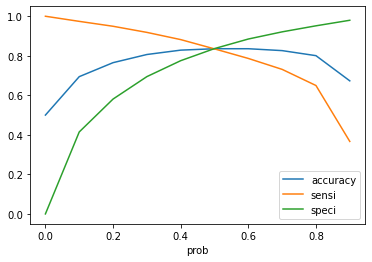

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [ ]:
##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.02,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.90,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.71,2,1,1,1,1,1,1,1,1,0,0,1
3,0,0.87,3,1,1,1,1,1,1,1,1,1,0,1
4,0,0.15,4,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
print(confusion)

[[16016  3132]
 [ 3162 15986]]


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8356486317108837

In [ ]:
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     19148
           1       0.84      0.83      0.84     19148

    accuracy                           0.84     38296
   macro avg       0.84      0.84      0.84     38296
weighted avg       0.84      0.84      0.84     38296



- As we see, the Recall score for Class 0(Non churners) is almost same as Class 1(Churners) which is a good sign.
- Recall is .83 for the Churners

### Making predictions on the test set

In [ ]:
X_test_sm = sm.add_constant(X_test[rfe_columns])

In [ ]:
y_test_pred = logreg_no_pca4.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

32833                   0.24
44447                   0.55
19820                   0.05
62112                   0.18
46165                   0.38
36231                   0.00
31937                   0.85
84187                   0.66
16331                   0.01
64916                   0.15
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
32833,0.24
44447,0.55
19820,0.05
62112,0.18
46165,0.38


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,churn,CustID,0
0,0,32833,0.24
1,0,44447,0.55
2,0,19820,0.05
3,0,62112,0.18
4,0,46165,0.38


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,CustID,Churn_Prob
0,0,32833,0.24
1,0,44447,0.55
2,0,19820,0.05
3,0,62112,0.18
4,0,46165,0.38


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [ ]:
y_pred_final.head()

,churn,CustID,Churn_Prob,final_predicted
0,0,32833,0.24,0
1,0,44447,0.55,1
2,0,19820,0.05,0
3,0,62112,0.18,0
4,0,46165,0.38,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8041248606465998

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6568, 1639],
       [ 118,  645]], dtype=int64)

In [ ]:
print(classification_report(y_pred_final.churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8207
           1       0.28      0.85      0.42       763

    accuracy                           0.80      8970
   macro avg       0.63      0.82      0.65      8970
weighted avg       0.92      0.80      0.84      8970



## Insight:
- As we see the Model performs well for both train and test data with Recall around 80% for both Churners and non-churners

## 8. Principal Component Analysis (PCA)

####  PCA
- PCA technique is particularly useful in processing data where multi-colinearity exists between the features/variables. PCA can be used when the dimensions of the input features are high (e.g. a lot of variables). In our case the number of variables is very high hence we will use PCA for dimensionality reduction after we split into train and test.
- We should build your PCA on your train set. Then we need to set your principal components to transform your points in test set into the same space. This way we can then use train and test set in the same reducted space.

### Fitting the PCA

In [ ]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

### Getting the principal components

In [ ]:
pca.components_

array([[ 5.54673182e-02,  1.31470805e-01,  1.77008359e-01, ...,
        -5.06351875e-02,  9.70413536e-02, -9.81136371e-02],
       [ 8.13892918e-02,  1.31677858e-01,  8.91995862e-02, ...,
        -2.17478105e-02, -7.62974389e-02, -4.36499013e-02],
       [ 2.16809826e-01, -4.20978921e-02, -1.78521176e-01, ...,
         1.42770628e-01, -6.44884773e-02,  1.66754729e-01],
       ...,
       [-0.00000000e+00,  2.34160870e-32,  1.71882494e-31, ...,
         1.69481835e-32,  3.81953279e-17,  7.39557099e-32],
       [ 0.00000000e+00, -3.71994255e-32, -2.17493796e-32, ...,
        -3.08148791e-33, -1.39414009e-16,  6.16297582e-33],
       [-0.00000000e+00,  1.10695991e-16, -1.63332626e-16, ...,
        -2.77555756e-17, -1.77246380e-01, -5.55111512e-17]])

In [ ]:
pd.DataFrame(pca.components_, index=X_train.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
arpu_6,0.06,0.13,0.18,-0.01,0.03,0.08,0.05,0.10,0.14,0.00,0.00,-0.00,0.00,-0.00,0.00,0.12,0.14,0.15,0.13,0.16,0.16,0.10,0.11,0.11,0.00,0.01,0.04,0.14,0.17,0.17,-0.06,-0.03,0.03,-0.04,-0.00,0.05,0.00,0.00,0.00,-0.07,-0.01,0.04,0.00,0.00,0.00,0.01,0.03,0.06,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.05,0.06,-0.02,0.03,0.07,0.05,0.13,0.17,0.07,0.10,0.15,0.05,0.08,0.11,0.03,0.04,0.06,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.07,0.05,0.00,0.00,0.11,0.12,0.18,-0.06,0.00,-0.05,0.10,-0.10
arpu_7,0.08,0.13,0.09,0.16,0.18,0.14,0.11,0.14,0.10,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.04,-0.02,-0.02,-0.07,-0.05,-0.04,-0.08,-0.08,-0.06,-0.00,0.05,0.05,-0.06,-0.04,-0.03,0.19,0.20,0.17,0.17,0.19,0.16,-0.00,-0.00,-0.00,0.24,0.26,0.20,-0.00,-0.00,-0.00,0.05,0.07,0.06,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.11,0.14,0.12,0.08,0.13,0.09,-0.08,-0.05,-0.02,-0.04,-0.02,-0.03,-0.07,-0.06,-0.05,-0.00,-0.07,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.07,-0.06,-0.08,-0.00,-0.00,0.12,0.18,0.12,-0.00,0.14,-0.02,-0.08,-0.04
arpu_8,0.22,-0.04,-0.18,0.11,-0.02,-0.11,0.21,0.04,-0.09,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.14,0.06,-0.02,0.17,0.08,-0.01,0.04,-0.00,-0.04,-0.00,-0.02,-0.06,0.17,0.08,-0.01,0.06,-0.04,-0.12,0.12,-0.01,-0.11,-0.00,-0.00,-0.00,0.15,-0.03,-0.14,-0.00,-0.00,-0.00,0.08,-0.00,-0.07,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,0.06,0.01,-0.03,0.18,0.00,-0.11,0.21,-0.06,-0.17,-0.01,-0.11,-0.17,-0.01,-0.08,-0.10,-0.03,-0.06,-0.07,-0.00,-0.07,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.08,-0.06,-0.00,-0.00,0.09,0.19,-0.11,0.19,0.10,0.14,-0.06,0.17
onnet_mou_6,0.19,0.10,0.02,0.01,-0.04,-0.08,0.07,0.01,-0.03,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.07,-0.09,-0.10,-0.05,-0.08,-0.08,0.08,0.06,0.05,-0.00,-0.04,-0.06,-0.07,-0.09,-0.10,0.04,-0.00,-0.04,0.09,0.04,-0.01,-0.00,0.00,-0.00,0.10,0.03,-0.03,-0.00,0.00,-0.00,-0.02,-0.07,-0.09,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.01,-0.02,-0.03,-0.13,-0.19,-0.18,0.19,0.09,0.01,0.29,0.25,0.15,0.21,0.15,0.09,0.09,0.08,0.05,-0.00,0.11,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.03,0.12,0.14,-0.00,-0.00,0.18,0.01,-0.09,0.07,-0.17,0.06,0.30,0.04
onnet_mou_7,-0.02,0.05,0.02,-0.36,-0.31,-0.22,0.26,0.30,0.18,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.10,-0.09,-0.07,0.02,0.04,0.03,-0.02,-0.01,-0.01,-0.00,0.03,-0.00,-0.03,-0.01,-0.02,-0.30,-0.27,-0.18,0.24,0.28,0.18,-0.00,0.00,-0.00,-0.04,0.01,-0.00,-0.00,0.00,-0.00,0.01,0.04,0.01,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,0.01,0.02,0.02,0.06,0.11,0.07,-0.02,0.05,0.01,-0.06,-0.03,-0.03,-0.05,-0.03,-0.03,0.01,0.02,0.01,-0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.04,0.01,0.01,-0.00,-0.00,0.02,-0.03,-0.01,-0.01,0.09,-0.01,-0.05,0.01
onnet_mou_8,-0.16,-0.17,-0.10,-0.03,-0.03,-0.02,-0.08,-0.07,-0.04,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.04,-0.05,-0.03,-0.06,-0.05,-0.04,0.01,0.01,0.01,-0.00,0.01,0.00,-0.07,-0.07,-0.06,0.03,0.02,0.04,0.01,0.01,0.03,0.00,-0.00,0.00,-0.03,-0.03,0.01,0.00,-0.00,0.00,0.01,0.02,0.02,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.02,0.03,-0.03,-0.02,0.01,-0.16,-0.17,-0.09,-0.10,-0.11,-0.08,-0.09,-0.07,-0.07,-0.04,-0.05,-0.03,0.00,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.05,-0.06,0.00,0.00,-0.20,-0.02,0.01,-0.00,-0.02,-0.03,-0.11,0.02
offnet_mou_6,0.10,0.15,0.05,-0.01,0.01,-0.03,-0.14,-0.11,-0.11,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.05,-0.05,-0.06,-0.05,-0.04,-0.07,-0.04,-0.04,-0.04,-0.00,0.13,0.06,-0.05,-0.05,-0.07,-0.00,0.01,-0.01,-0.14,-0.12,-0.10,0.00,0.00,0.00,-0.08,-0.05,-0.07,0.00,-0.00,0.00,0.16,

### Getting the variance ratio of all the principal components

In [ ]:
pca.explained_variance_ratio_

array([2.02212223e-01, 1.40543591e-01, 8.19573755e-02, 5.50160964e-02,
       5.04928480e-02, 4.86646521e-02, 3.89925415e-02, 3.13354574e-02,
       2.09374531e-02, 1.95756022e-02, 1.80838337e-02, 1.61542052e-02,
       1.51772368e-02, 1.39103944e-02, 1.22240770e-02, 1.20154949e-02,
       1.03961375e-02, 9.41534895e-03, 9.04380085e-03, 8.91585746e-03,
       8.51432101e-03, 8.18738872e-03, 7.70239449e-03, 7.31746085e-03,
       7.04627378e-03, 6.77892470e-03, 6.64249107e-03, 6.25255680e-03,
       5.81412642e-03, 5.59729405e-03, 5.55614674e-03, 5.14492101e-03,
       4.97418029e-03, 4.89105638e-03, 4.73684436e-03, 4.62121817e-03,
       4.57411454e-03, 4.36832850e-03, 4.11947143e-03, 3.91409131e-03,
       3.66390990e-03, 3.57006862e-03, 3.33042714e-03, 3.22463821e-03,
       3.16717012e-03, 3.02519788e-03, 2.94027605e-03, 2.74603532e-03,
       2.68125566e-03, 2.44687668e-03, 2.32253853e-03, 2.26706771e-03,
       2.25168950e-03, 2.10451113e-03, 1.98493500e-03, 1.95097880e-03,
      

### Scree Plot

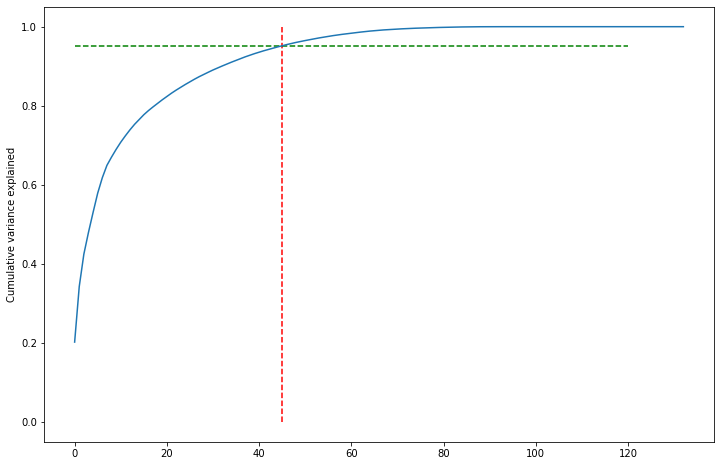

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=45, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Insight
- With just only 45 components, we get around 95% of the variance (information) of the data. So, we will perform PCA on 45 components only.

### PCA with 45 Components

In [ ]:
pca1 = PCA(n_components=45, random_state=42)
X_train_pca = pca1.fit_transform(X_train)

In [ ]:
sum(pca1.explained_variance_ratio_)

0.9487177717913469

In [ ]:
y_test.shape

(8970,)

- 93% of the variance of the original data has been covered with just 20 components in PCA.

### Perform Incremental PCA with 45 components

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
pca_final = IncrementalPCA(n_components=45)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

(38296, 45)

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
corrmat.shape

(45, 45)

Plotting the heatmap of the corr matrix

<AxesSubplot:>

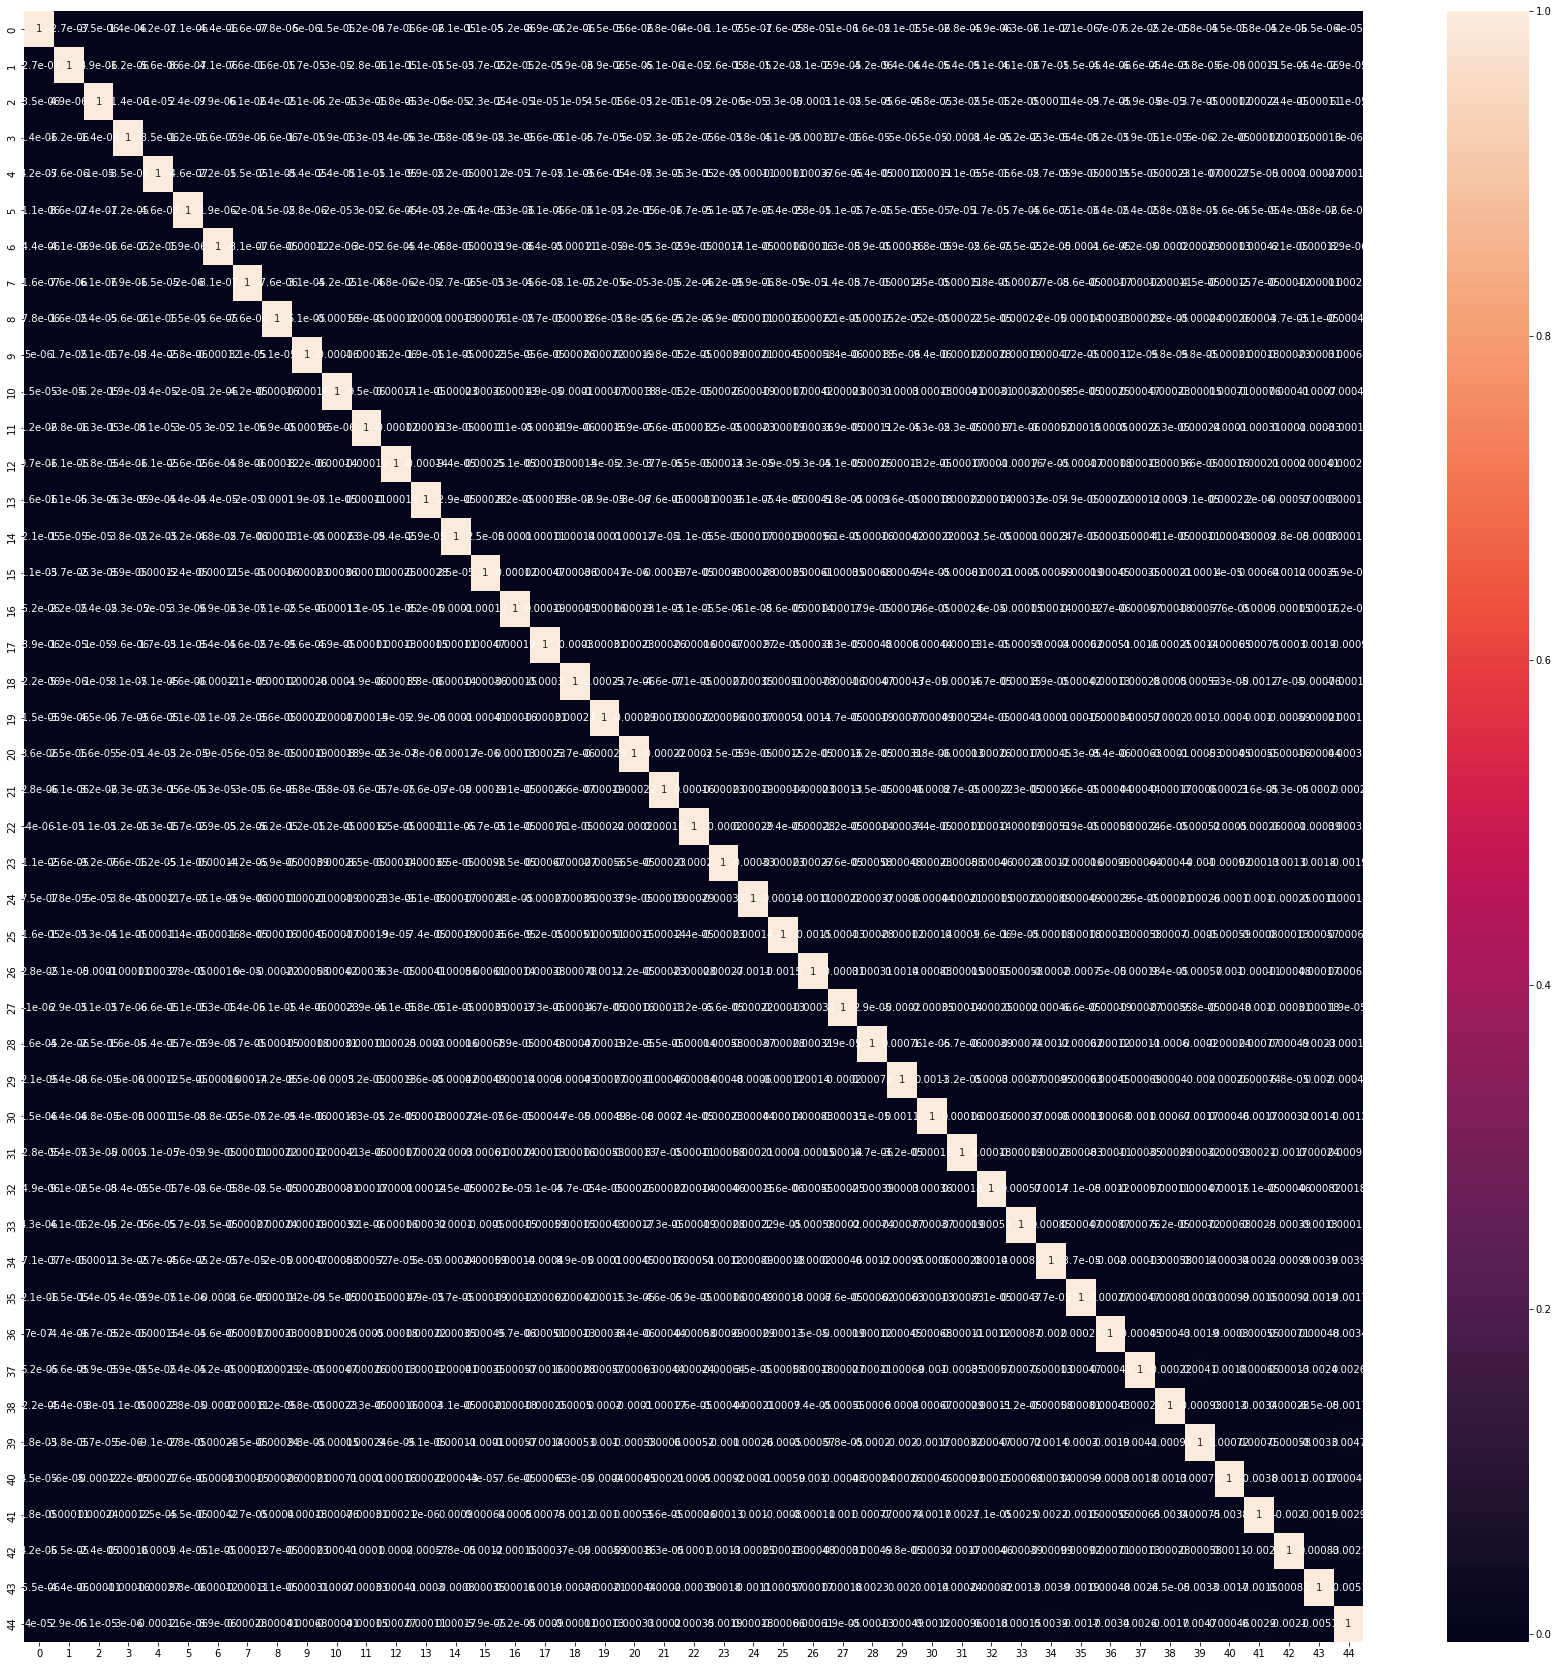

In [ ]:
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

### Applying the transformation on the test set

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8970, 45)

# Logistic regression Model with PCA


In [ ]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

In [ ]:
#Making predictions on the test set
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

In [ ]:
y_test.shape

(8970,)

In [ ]:
y_test_pred = model_pca.predict(df_test_pca)

In [ ]:
y_test_pred[:10]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

,0
0,1
1,1
2,0
3,0
4,0


In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df['mobile_number'] = telecom_data_test.index
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final = y_pred_final[['mobile_number','churn','Churn_Prob']]

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,mobile_number,churn,Churn_Prob,predicted
0,32833,0,1,1
1,44447,0,1,1
2,19820,0,0,0
3,62112,0,0,0
4,46165,0,0,0


### Model Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6858, 1349],
       [ 144,  619]], dtype=int64)

In [ ]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8335562987736901

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

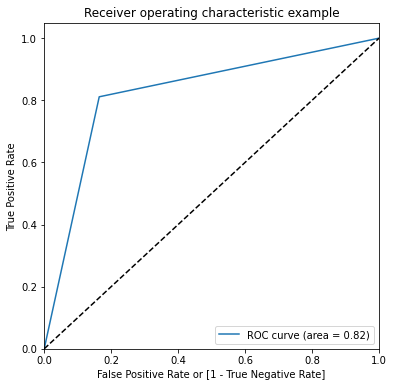

(array([0.        , 0.16437188, 1.        ]),
 array([0.       , 0.8112713, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [ ]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [ ]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.82'

In [ ]:
print(classification_report(y_pred_final.churn, y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8207
           1       0.31      0.81      0.45       763

    accuracy                           0.83      8970
   macro avg       0.65      0.82      0.68      8970
weighted avg       0.92      0.83      0.86      8970



#### We can see from the model performance that the Recall scores are very good with this model.

## Evaluating Decision tree Model with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_pca = DecisionTreeClassifier(random_state=42, max_depth=4)

In [ ]:
dt_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_train_pred = dt_pca.predict(df_train_pca)
y_test_pred = dt_pca.predict(df_test_pca)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72     19148
           1       0.72      0.67      0.70     19148

    accuracy                           0.71     38296
   macro avg       0.71      0.71      0.71     38296
weighted avg       0.71      0.71      0.71     38296



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      8207
           1       0.19      0.65      0.30       763

    accuracy                           0.74      8970
   macro avg       0.58      0.70      0.57      8970
weighted avg       0.89      0.74      0.79      8970



- As we see, the Recall scores are low with this model

#### Hyper-parameter tuning using Grid Search CV for the Decision Tree
- Using the scoring metric as Recall

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt_pca1 = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt_pca1,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [ ]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 3.86 s
Wall time: 45.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [ ]:
grid_search.best_score_

0.8947148527261333

In [ ]:
dt_best_pca = grid_search.best_estimator_
dt_best_pca

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

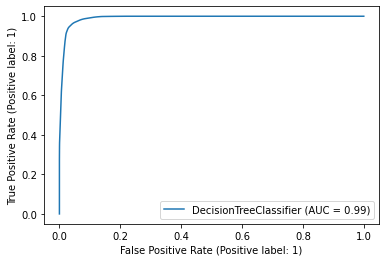

In [ ]:
plot_roc_curve(dt_best_pca, df_train_pca, y_train)
plt.show()

In [ ]:
y_train_pred = dt_best_pca.predict(df_train_pca)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     19148
           1       0.96      0.96      0.96     19148

    accuracy                           0.96     38296
   macro avg       0.96      0.96      0.96     38296
weighted avg       0.96      0.96      0.96     38296



- As we see, the best Recall Score using Grid Search CV in Decision Tree is 89.4 %
- and the best estimators are Max Depth of 20 and Min_samples_leaf as 50

## Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = dt_best_pca.predict(df_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7099 1108]
 [ 310  453]]


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      8207
           1       0.29      0.59      0.39       763

    accuracy                           0.84      8970
   macro avg       0.62      0.73      0.65      8970
weighted avg       0.90      0.84      0.87      8970



- We can see from the model performance that the Recall score has decreased while evaluating the model on the test set.

### Evaluating Random Forest Model with PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_pca = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [ ]:
rf_pca.fit(df_train_pca, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

**Performance on the train set**

In [ ]:
y_train_pred = rf_pca.predict(df_train_pca)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.9999738876122832

In [ ]:
recall_score(y_train, y_train_pred)

1.0

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19148
           1       1.00      1.00      1.00     19148

    accuracy                           1.00     38296
   macro avg       1.00      1.00      1.00     38296
weighted avg       1.00      1.00      1.00     38296



**Performance on unseen data**

In [ ]:
y_test_pred = rf_pca.predict(df_test_pca)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8207
           1       0.55      0.57      0.56       763

    accuracy                           0.92      8970
   macro avg       0.75      0.76      0.76      8970
weighted avg       0.92      0.92      0.92      8970



In [ ]:
accuracy_score(y_test, y_test_pred)

0.9231884057971015

In [ ]:
recall_score(y_test, y_test_pred)

0.5661861074705111

- As we see, the Recall score for Class 0(Non churners) is more (+39%) than Class 1(Churners). And also the Recall scores have dropped significantly on test data.
- Hence this model does not show good sensitivity for the Churners
- We see that with simple Random Forest Classifier Model with PCA has a sensitivity score of 57% on test data.
- Note the all scores are 1 for the train data stating the model is overfitting

# Summary of stats from all the models used

![image.png](attachment:image.png)

### Insights from above data:

Looking at the above readings, we can conclude that the logistic model with no PCA has good sensitivity and accuracy, almost same as to models with PCA.
Hence, choosing a simple model like Logistic Regression with RFE and without PCA or Logistic Regression with PCA will help us to identify the variables without lot of complexity. Hence, the model is more relevant in terms of explaining to the business.

### The below table shows the important indicators to predict whether customer will Churn or not from Logistic Regression Model:

![image-2.png](attachment:image-2.png)

## Summary Recommendations:
As we can see that most of the variables selected have negative coefficients. That means, these variables are inversely correlated with the probability of churning.

Conclusion points:

- If the local incoming minutes of usage for Operator mobile to other operator mobile is decreasing in the month of August, then there are more chances of the customer churning in the 9th month.
- Customers whose Recharge Amount on the last day in 8th (Aug) month is decreasing are more likely to churn
- Customers whose Mobile internet usage volume (in MB) for 2g in the 8th month (Aug) is decreasing are more likely to churn.
- Customers whose Total Number of recharges in the 8th month (Aug) is decreasing are more likely to churn.
- Customers whose minutes of usage for STD outgoing calls in the 8th month (Aug) is decreasing are more likely to churn.
- Customers whose Incoming calls from others in the 8th month (Aug) is decreasing are more likely to churn.
- Customers whose Maximum Recharge amount in 6th month (June) are more likely to churn.
- Customers whose Local incoming calls Operator T to fixed lines of T in 8th month (Aug) are descreasing are more likely to churn.
- Customers whose Age on network - number of days the customer is using the operator T network is less , churn rate is more.
- Customers whose Local incoming calls Operator T or Operator T same operator in 8th month (Aug) are descreasing are more likely to churn.
- Customers whose total incoming calls minutes usage in the 6th month (June) is more they are more likely to Churn.
- Customers whose recharge amount in 6th month is high are more likely to churn.
- Customers whose local icoming calls Operator T to other operator mobile in the 7th month (July) is more are more likely to churn.
